## Seminar 3 - FFT filter bank

4 subband FFT filter bank should be comared with FB from Seminar 3.

In [1]:
import numpy as np
import sound
import scipy.signal as sig
import scipy.optimize as opt
import scipy.io.wavfile as wav
import pyaudio
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [8,6]

Load audio file

In [2]:
pathToAudio = "data/Track48.wav"
fs, data = wav.read(pathToAudio)
duration = 5 # seconds
audio = np.array(data[:fs*duration,0]) # use only one channel
print('Sampling rate: {}'.format(fs))
print('Data Type: ', audio.dtype)
print('Shape of one channel: {}'.format(audio.shape))

Sampling rate: 44100
Data Type:  int16
Shape of one channel: (220500,)


In [3]:
nTabs = 64
blocksize = 8
nSubbands = 4

FFT via FFT Matrix

In [4]:
I = np.eye(blocksize)
fftMat = np.fft.fft(I)
print(fftMat.shape)

(8, 8)


Compute Blockwise fft on blocks of 8 samples:

In [11]:
newlength = audio.shape[0] - (audio.shape[0] % blocksize) # length so it fits into blocks of size blocksize
stackedBlocks = np.reshape(audio[0:newlength],(int(newlength/blocksize), blocksize))
# transformed = np.fft.fft(stackedBlocks,axis=1)
transformed = np.dot(stackedBlocks, fftMat)

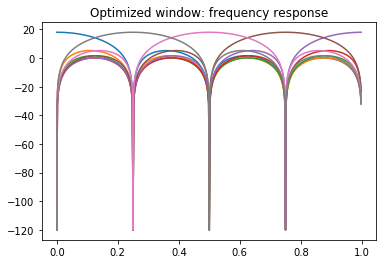

In [14]:
for bandIx in range(blocksize):
    w,h = sig.freqz(fftMat[:,bandIx])
    plt.plot(w/np.pi, 20*np.log10(abs(h)+1e-6))
plt.title('Freq. response of DFT Transform seen as filter bank')
plt.show()

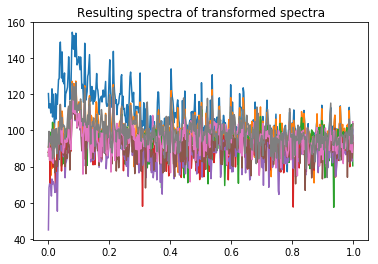

In [15]:
for bandIx in range(blocksize):
    w,h = sig.freqz(transformed[:,bandIx])
    plt.plot(w/np.pi, 20*np.log10(abs(h)+1e-6))
plt.title('Resulting spectra of transformed spectra')
plt.show()